In [3]:
import numpy as np
from joblib import dump

from scipy.optimize import brentq
from scipy.interpolate import interp1d
from tqdm import tqdm
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# DATA LOADING

In [4]:
base_path = '../Data/pa_embedding_files1/'

methods = [
    'cqccs',
    'cqccs_mean',
    'cqccs_mean_std',
    'cqccs_mean_std_avg',
    'mfccs',
    'mfccs_mean',
    'mfccs_mean_std',
    'mfccs_mean_std_avg',
    'unispeechsat_embedding',
    'wlxvector_embedding'
]

# SVM Classifier + EER 

Traitement des méthodes:   0%|          | 0/10 [00:00<?, ?it/s]

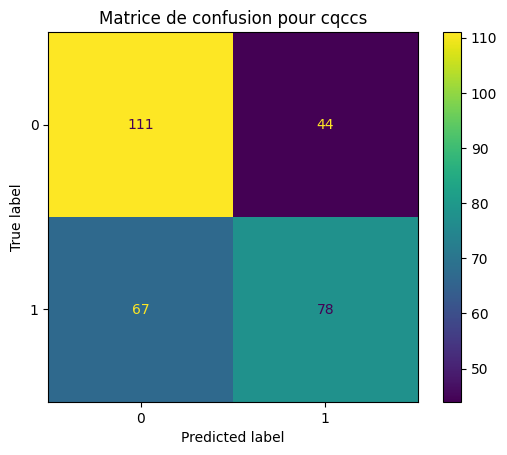

Traitement des méthodes:  10%|█         | 1/10 [05:31<49:43, 331.54s/it]

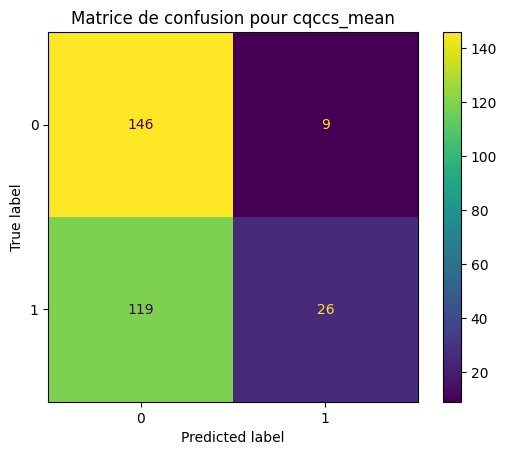

Traitement des méthodes:  20%|██        | 2/10 [05:32<18:14, 136.86s/it]

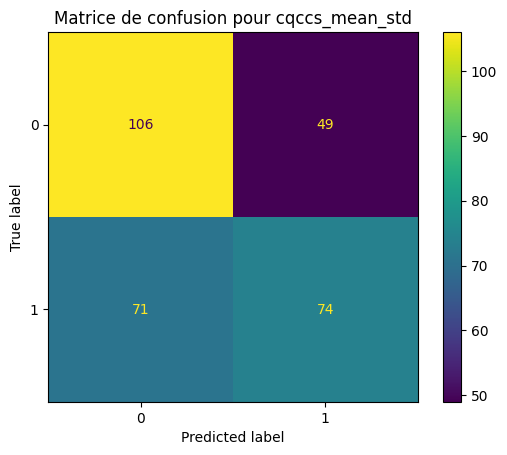

Traitement des méthodes:  30%|███       | 3/10 [05:32<08:42, 74.66s/it] 

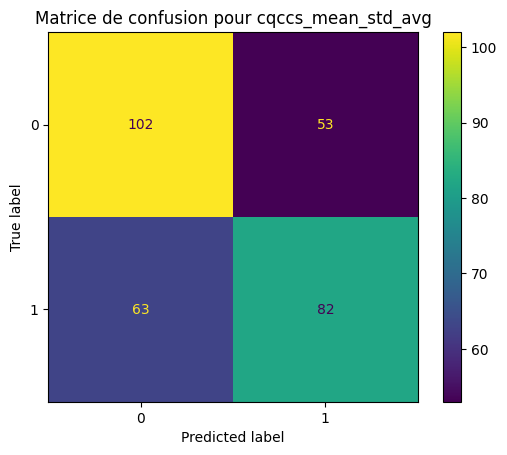

Traitement des méthodes:  40%|████      | 4/10 [05:33<04:32, 45.48s/it]

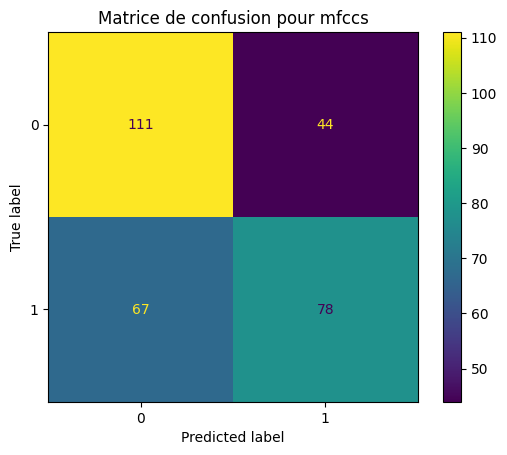

Traitement des méthodes:  50%|█████     | 5/10 [11:24<12:57, 155.54s/it]

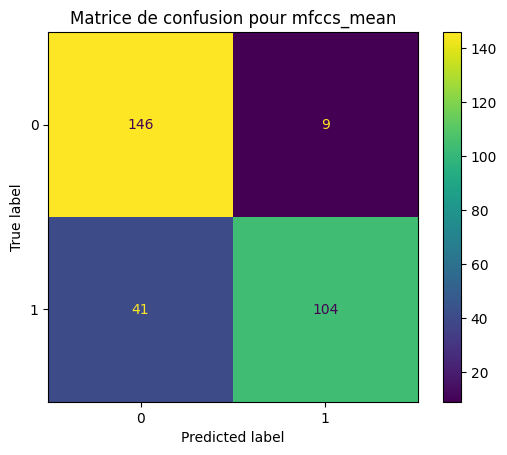

Traitement des méthodes:  60%|██████    | 6/10 [11:24<06:51, 102.78s/it]

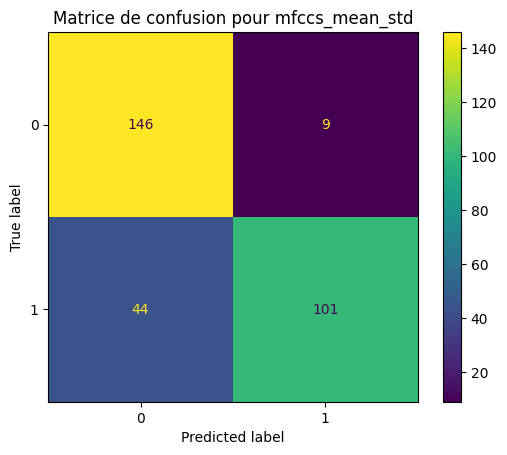

Traitement des méthodes:  70%|███████   | 7/10 [11:24<03:27, 69.32s/it] 

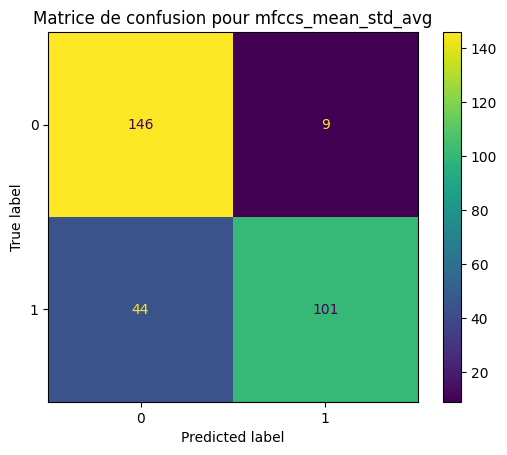

Traitement des méthodes:  80%|████████  | 8/10 [11:25<01:34, 47.43s/it]

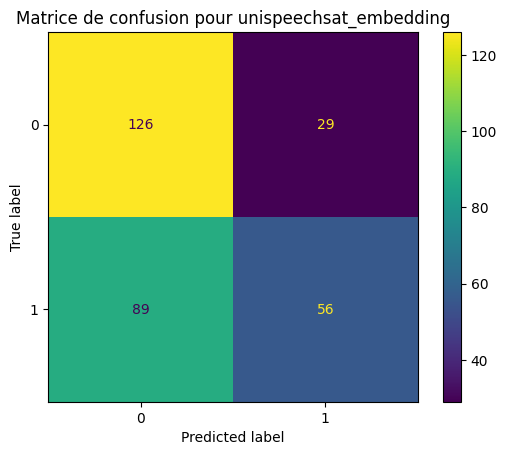

Traitement des méthodes:  90%|█████████ | 9/10 [11:26<00:32, 32.96s/it]

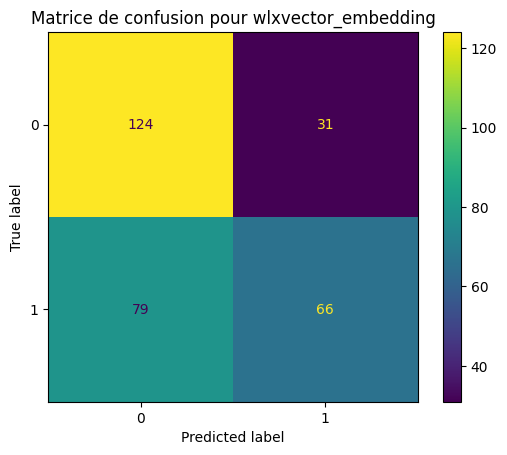

Traitement des méthodes: 100%|██████████| 10/10 [11:27<00:00, 68.78s/it]

  Feature Extraction Technique       EER
0                        cqccs  0.658065
1                   cqccs_mean  0.587097
2               cqccs_mean_std  0.593548
3           cqccs_mean_std_avg  0.620690
4                        mfccs  0.658065
5                   mfccs_mean  0.820690
6               mfccs_mean_std  0.800000
7           mfccs_mean_std_avg  0.800000
8       unispeechsat_embedding  0.634483
9          wlxvector_embedding  0.627586


In [3]:
from sklearn.svm import SVC
label_encoder = LabelEncoder()


methods_list = []
eer_list = []


models_path = '../Models/SVM-err'  
if not os.path.exists(models_path):
    os.makedirs(models_path) 

for method in tqdm(methods, desc="Traitement des méthodes"):
    features_path = os.path.join(base_path, f'{method}.tsv')
    metadata_path = os.path.join(base_path, f'{method}_metadata.tsv')
    
    features = pd.read_csv(features_path, sep='\t', header=None)
    metadata = pd.read_csv(metadata_path, sep='\t', header=None)
    X = features.values
    y = metadata.iloc[:, -1].values
    
    y_encoded = label_encoder.fit_transform(y)
    
    X, y_encoded = shuffle(X, y_encoded, random_state=42)
    
    X_sub = X[:1500]
    y_sub = y_encoded[:1500]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)
    
    clf = SVC(probability=True)
    clf.fit(X_train, y_train)
    
    model_filename = f'{models_path}/svm_{method}.joblib'
    dump(clf, model_filename)

    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=label_encoder.transform(['bonafide'])[0])
    
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    
    methods_list.append(method)
    eer_list.append(eer)
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Matrice de confusion pour {method}')
    plt.show()


results_df = pd.DataFrame({
    'Feature Extraction Technique': methods_list,
    'EER': eer_list
})

print(results_df)

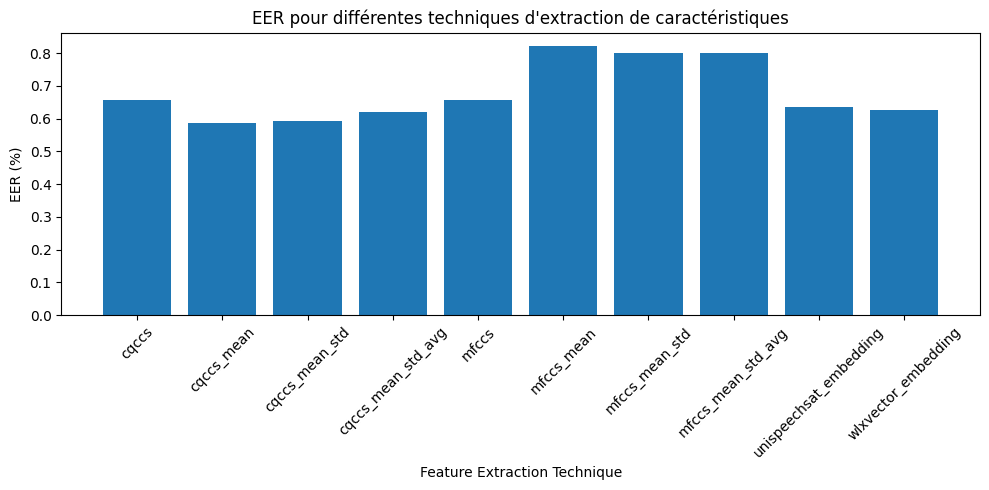

In [4]:
plt.figure(figsize=(10, 5))  
plt.bar(methods_list, eer_list)  
plt.xlabel('Feature Extraction Technique')
plt.ylabel('EER (%)')  
plt.title('EER pour différentes techniques d\'extraction de caractéristiques') 
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  

In [5]:
results_df.to_csv('../Data/SVM-ERR-results.csv', index=False)

# GMM+ERR

Traitement des méthodes:   0%|          | 0/10 [00:00<?, ?it/s]

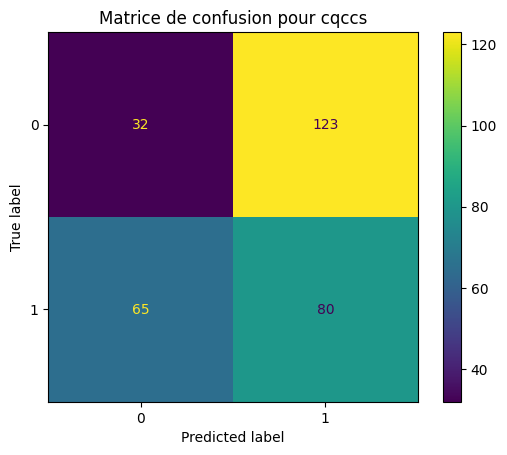

Traitement des méthodes:  10%|█         | 1/10 [06:24<57:39, 384.34s/it]

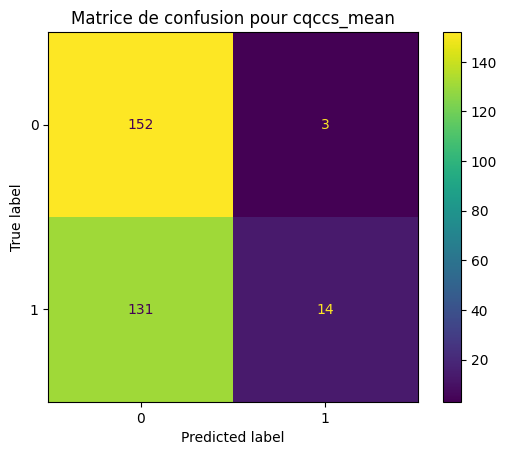

Traitement des méthodes:  20%|██        | 2/10 [06:31<21:41, 162.71s/it]

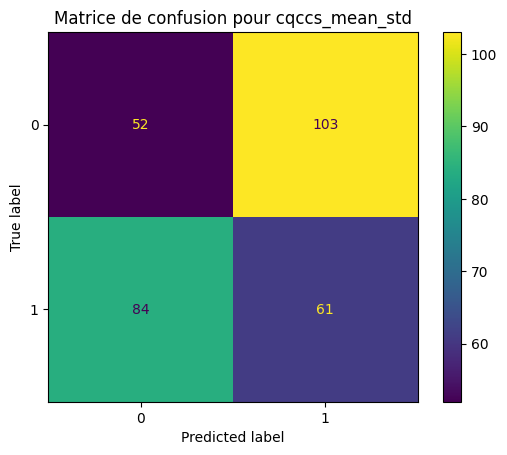

Traitement des méthodes:  30%|███       | 3/10 [06:32<10:19, 88.53s/it] 

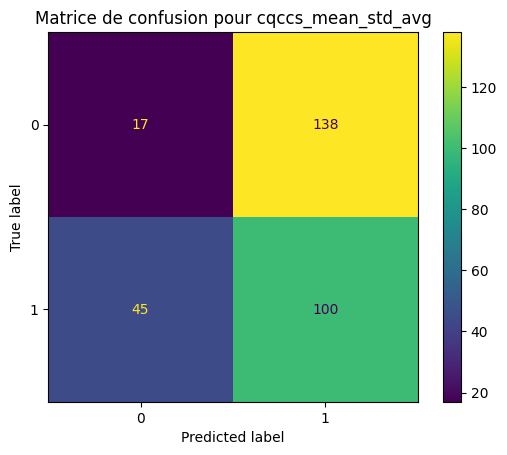

Traitement des méthodes:  40%|████      | 4/10 [06:32<05:23, 53.86s/it]

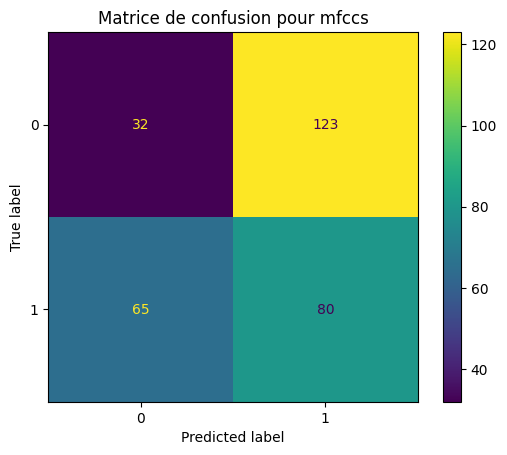

Traitement des méthodes:  50%|█████     | 5/10 [13:31<15:26, 185.32s/it]

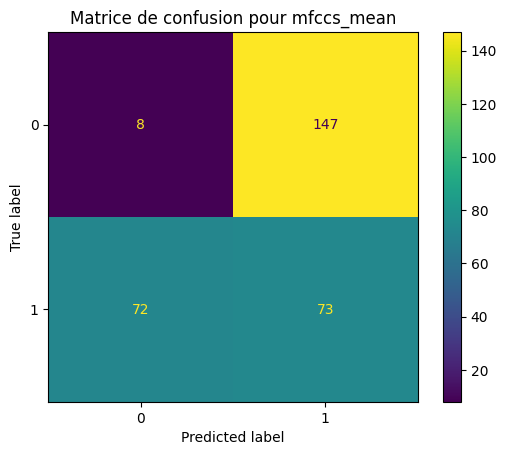

Traitement des méthodes:  60%|██████    | 6/10 [13:32<08:10, 122.58s/it]

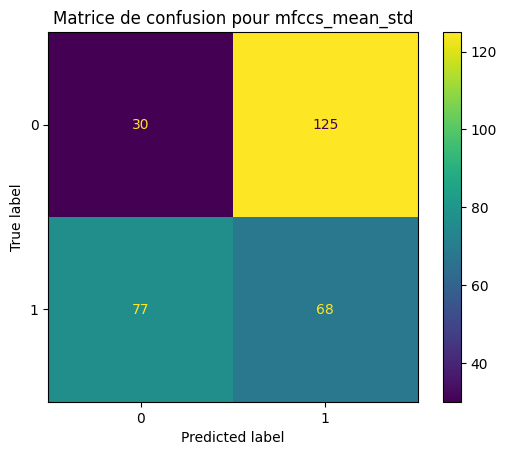

Traitement des méthodes:  70%|███████   | 7/10 [13:32<04:08, 82.67s/it] 

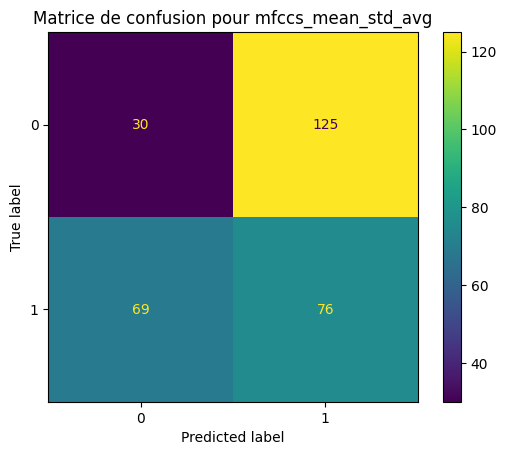

Traitement des méthodes:  80%|████████  | 8/10 [13:33<01:53, 56.54s/it]

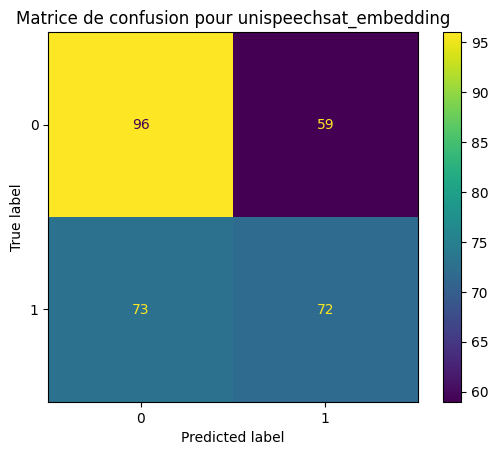

Traitement des méthodes:  90%|█████████ | 9/10 [13:34<00:39, 39.24s/it]

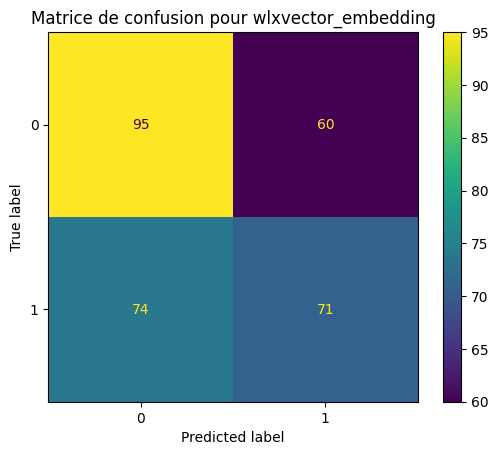

Traitement des méthodes: 100%|██████████| 10/10 [13:35<00:00, 81.57s/it]

  Feature Extraction Technique       EER
0                        cqccs  0.410121
1                   cqccs_mean  0.600000
2               cqccs_mean_std  0.361290
3           cqccs_mean_std_avg  0.365517
4                        mfccs  0.410121
5                   mfccs_mean  0.309677
6               mfccs_mean_std  0.358621
7           mfccs_mean_std_avg  0.393548
8       unispeechsat_embedding  0.572414
9          wlxvector_embedding  0.551724


In [24]:
from sklearn.mixture import GaussianMixture

methods_list = []
eer_list = []


models_path = '../Models/GMM-err'  
if not os.path.exists(models_path):
    os.makedirs(models_path) 

results_df = pd.DataFrame(columns=['Method', 'EER'])

label_encoder = LabelEncoder()

for method in tqdm(methods, desc="Traitement des méthodes"):
    
    features_path = os.path.join(base_path, f'{method}.tsv')
    metadata_path = os.path.join(base_path, f'{method}_metadata.tsv')
    
    features = pd.read_csv(features_path, sep='\t', header=None)
    metadata = pd.read_csv(metadata_path, sep='\t', header=None)
    X = features.values
    y = metadata.iloc[:, -1].values

    y_encoded = label_encoder.fit_transform(y)
    
    X, y_encoded = shuffle(X, y_encoded, random_state=42)
    
    X_sub = X[:1500]
    y_sub = y_encoded[:1500]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)
    
    n_classes = len(np.unique(y_sub))
    gmm = GaussianMixture(n_components=n_classes, covariance_type='full', random_state=42)
    
    gmm.fit(X_train)

    model_filename = os.path.join(models_path, f'gmm_{method}.joblib')
    dump(gmm, model_filename)
    

    y_pred = gmm.predict(X_test)
    y_score = gmm.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=label_encoder.transform(['bonafide'])[0])
    
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    
    methods_list.append(method)
    eer_list.append(eer)
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Matrice de confusion pour {method}')
    plt.show()


results_df = pd.DataFrame({
    'Feature Extraction Technique': methods_list,
    'EER': eer_list
})

print(results_df)

In [25]:
results_df.to_csv('../Data/GMM-ERR-results.csv', index=False)

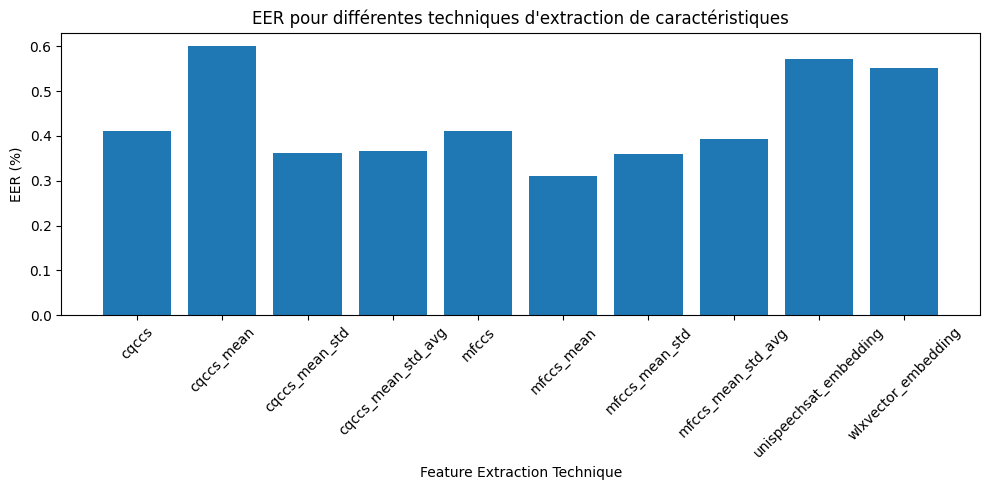

In [26]:
plt.figure(figsize=(10, 5))  
plt.bar(methods_list, eer_list)  
plt.xlabel('Feature Extraction Technique')
plt.ylabel('EER (%)')  
plt.title('EER pour différentes techniques d\'extraction de caractéristiques') 
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  

Traitement des méthodes:   0%|          | 0/10 [00:00<?, ?it/s]

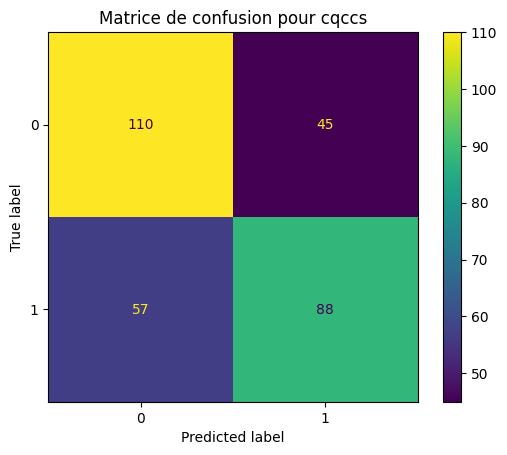

Traitement des méthodes:  10%|█         | 1/10 [00:21<03:15, 21.77s/it]

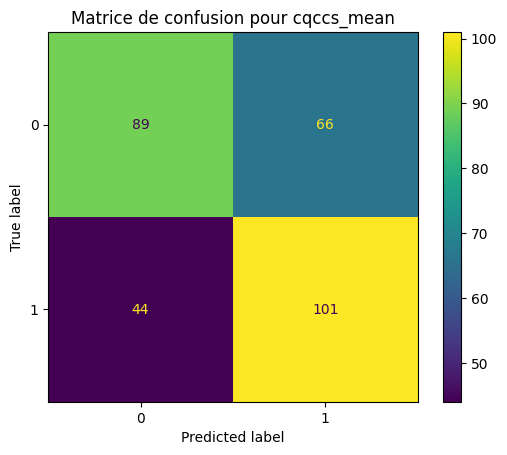

Traitement des méthodes:  20%|██        | 2/10 [00:22<01:15,  9.40s/it]

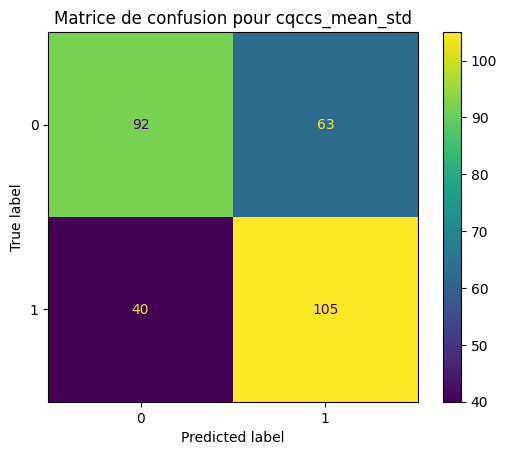

Traitement des méthodes:  30%|███       | 3/10 [00:23<00:38,  5.53s/it]

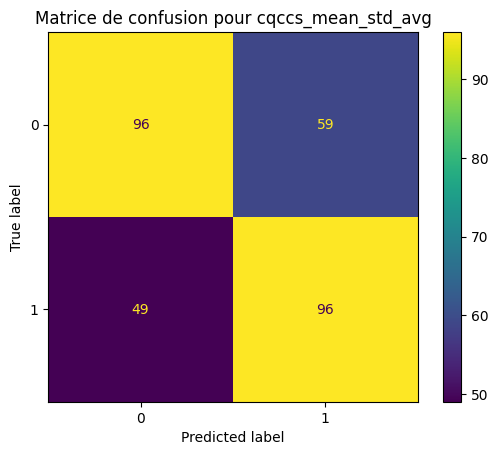

Traitement des méthodes:  40%|████      | 4/10 [00:24<00:22,  3.81s/it]

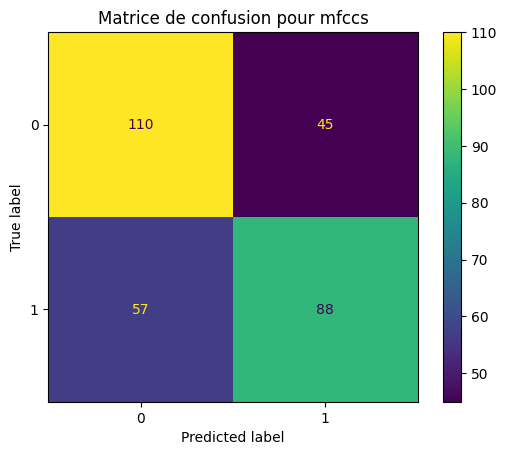

Traitement des méthodes:  50%|█████     | 5/10 [00:46<00:52, 10.45s/it]

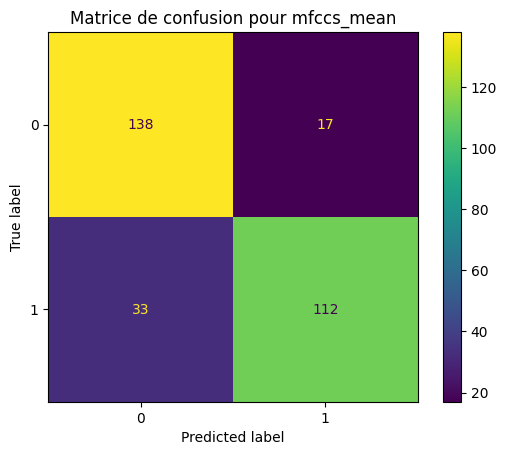

Traitement des méthodes:  60%|██████    | 6/10 [00:47<00:28,  7.15s/it]

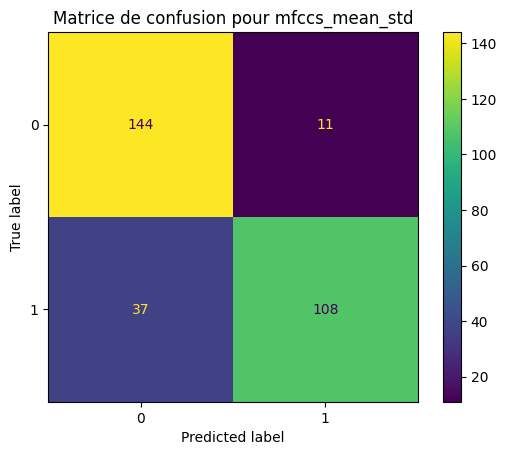

Traitement des méthodes:  70%|███████   | 7/10 [00:48<00:15,  5.11s/it]

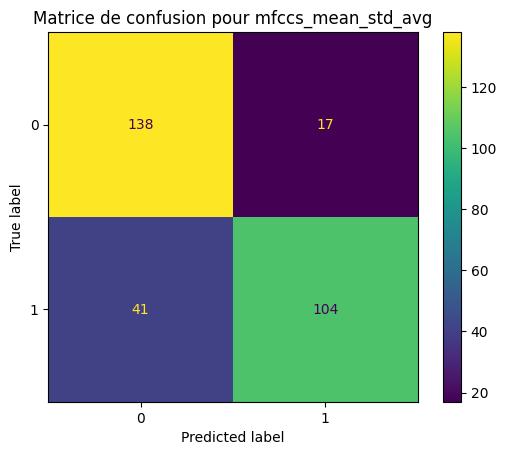

Traitement des méthodes:  80%|████████  | 8/10 [00:49<00:07,  3.84s/it]

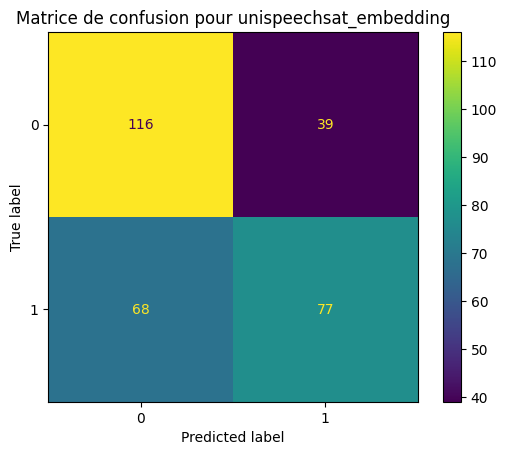

Traitement des méthodes:  90%|█████████ | 9/10 [00:51<00:03,  3.29s/it]

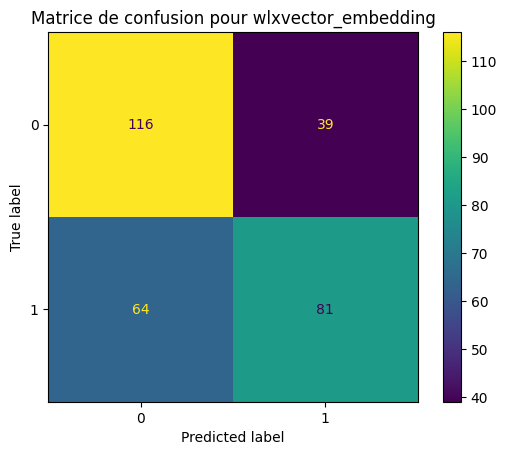

Traitement des méthodes: 100%|██████████| 10/10 [00:53<00:00,  5.39s/it]

  Feature Extraction Technique       EER  Accuracy
0                        cqccs  0.366102  0.660000
1                   cqccs_mean  0.354244  0.633333
2               cqccs_mean_std  0.332394  0.656667
3           cqccs_mean_std_avg  0.363033  0.640000
4                        mfccs  0.366102  0.660000
5                   mfccs_mean  0.181356  0.833333
6               mfccs_mean_std  0.182022  0.840000
7           mfccs_mean_std_avg  0.193103  0.806667
8       unispeechsat_embedding  0.357303  0.643333
9          wlxvector_embedding  0.336119  0.656667


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, accuracy_score

methods_list = []
eer_list = []
accuracy_list = []


models_path = '../Models/RF-err'  
if not os.path.exists(models_path):
    os.makedirs(models_path) 

results_df = pd.DataFrame(columns=['Method', 'EER'])

label_encoder = LabelEncoder()

for method in tqdm(methods, desc="Traitement des méthodes"):
    
    features_path = os.path.join(base_path, f'{method}.tsv')
    metadata_path = os.path.join(base_path, f'{method}_metadata.tsv')
    
    features = pd.read_csv(features_path, sep='\t', header=None)
    metadata = pd.read_csv(metadata_path, sep='\t', header=None)
    X = features.values
    y = metadata.iloc[:, -1].values

    y_encoded = label_encoder.fit_transform(y)
    
    X, y_encoded = shuffle(X, y_encoded, random_state=42)
    
    X_sub = X[:1500]
    y_sub = y_encoded[:1500]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    model_filename = os.path.join(models_path, f'rf_{method}.joblib')
    dump(clf, model_filename)
    
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)

    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    
    methods_list.append(method)
    eer_list.append(eer)
    accuracy_list.append(accuracy)  
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Matrice de confusion pour {method}')
    plt.show()

results_df = pd.DataFrame({
    'Feature Extraction Technique': methods_list,
    'EER': eer_list,
    'Accuracy': accuracy_list  
})

print(results_df)

In [9]:
results_df.to_csv('../Data/rf-ERR-results.csv', index=False)

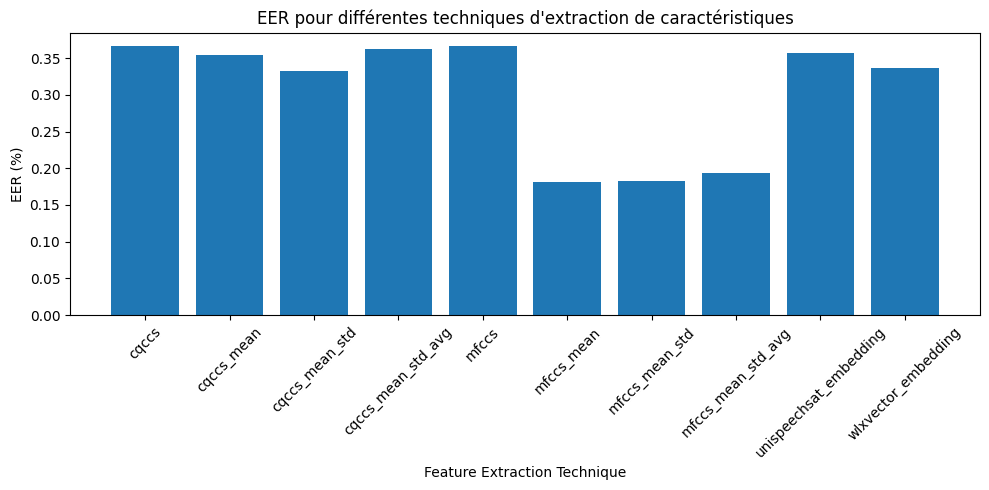

In [10]:
plt.figure(figsize=(10, 5))  
plt.bar(methods_list, eer_list)  
plt.xlabel('Feature Extraction Technique')
plt.ylabel('EER (%)')  
plt.title('EER pour différentes techniques d\'extraction de caractéristiques') 
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  

Traitement des méthodes:   0%|          | 0/10 [00:00<?, ?it/s]

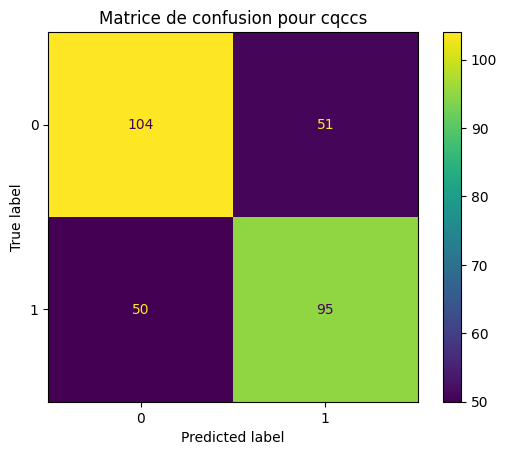

Traitement des méthodes:  10%|█         | 1/10 [01:12<10:48, 72.07s/it]

Accuracy pour cqccs: 0.66


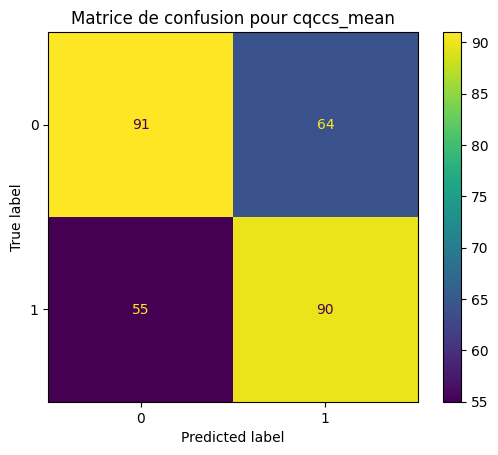

Traitement des méthodes:  20%|██        | 2/10 [01:12<03:59, 29.89s/it]

Accuracy pour cqccs_mean: 0.60


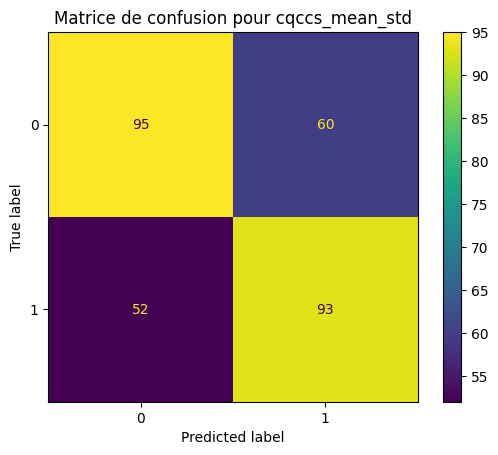

Traitement des méthodes:  30%|███       | 3/10 [01:13<01:55, 16.54s/it]

Accuracy pour cqccs_mean_std: 0.63


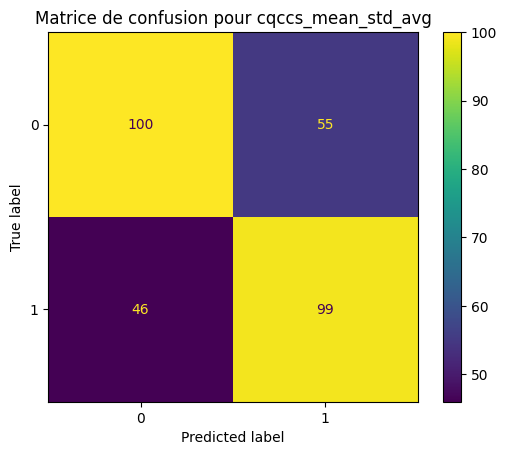

Traitement des méthodes:  40%|████      | 4/10 [01:13<01:01, 10.33s/it]

Accuracy pour cqccs_mean_std_avg: 0.66


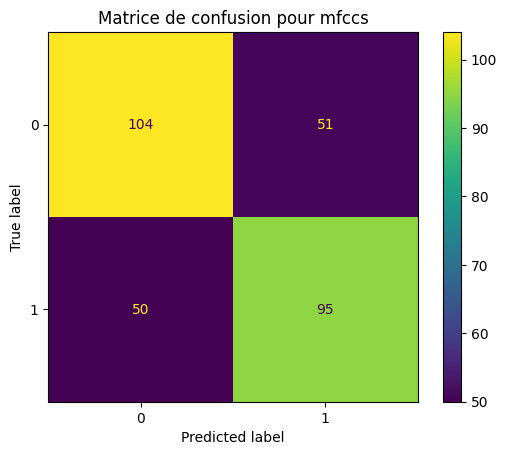

Traitement des méthodes:  50%|█████     | 5/10 [02:25<02:42, 32.57s/it]

Accuracy pour mfccs: 0.66


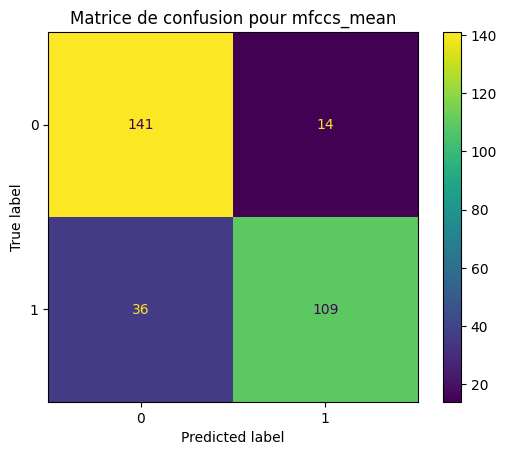

Traitement des méthodes:  60%|██████    | 6/10 [02:26<01:26, 21.61s/it]

Accuracy pour mfccs_mean: 0.83


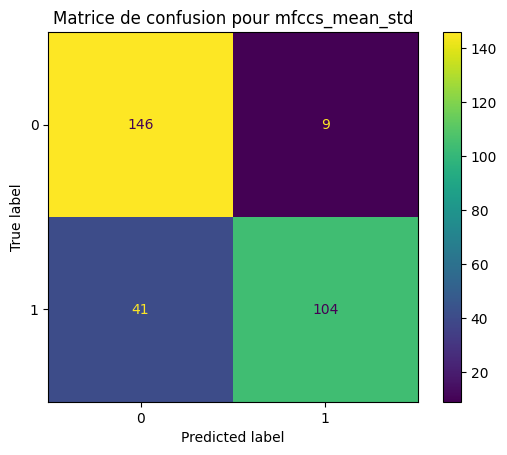

Traitement des méthodes:  70%|███████   | 7/10 [02:26<00:44, 14.69s/it]

Accuracy pour mfccs_mean_std: 0.83


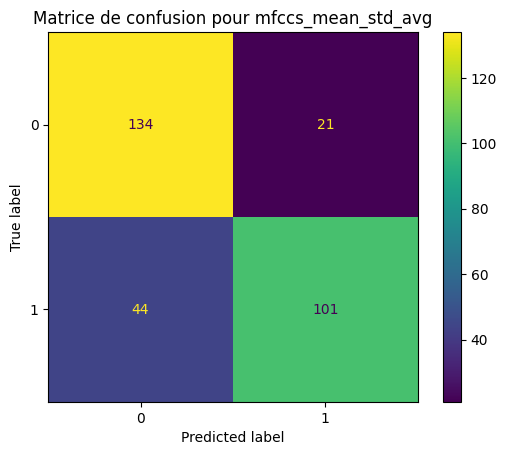

Traitement des méthodes:  80%|████████  | 8/10 [02:27<00:20, 10.19s/it]

Accuracy pour mfccs_mean_std_avg: 0.78


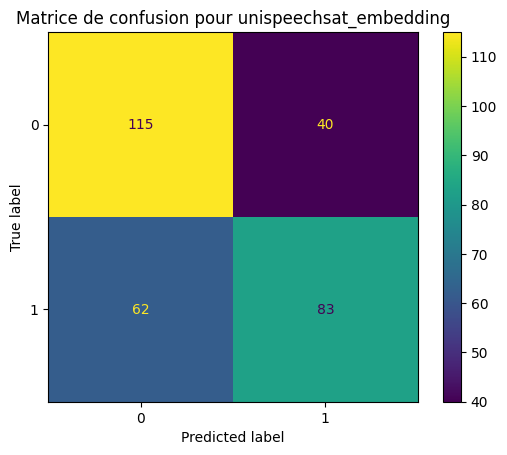

Traitement des méthodes:  90%|█████████ | 9/10 [02:29<00:07,  7.79s/it]

Accuracy pour unispeechsat_embedding: 0.66


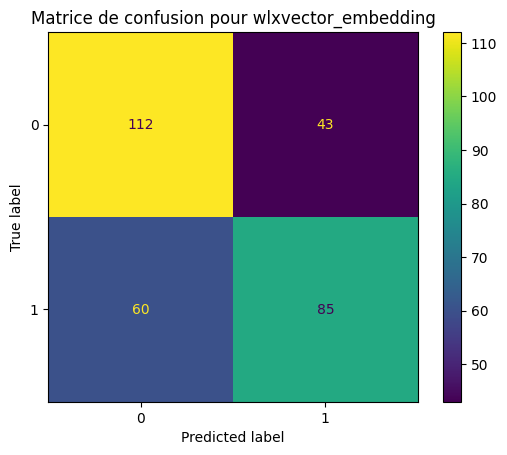

Traitement des méthodes: 100%|██████████| 10/10 [02:32<00:00, 15.21s/it]

Accuracy pour wlxvector_embedding: 0.66
  Feature Extraction Technique       EER  Accuracy
0                        cqccs  0.331034  0.663333
1                   cqccs_mean  0.400000  0.603333
2               cqccs_mean_std  0.365517  0.626667
3           cqccs_mean_std_avg  0.337931  0.663333
4                        mfccs  0.331034  0.663333
5                   mfccs_mean  0.174194  0.833333
6               mfccs_mean_std  0.193548  0.833333
7           mfccs_mean_std_avg  0.200000  0.783333
8       unispeechsat_embedding  0.322581  0.660000
9          wlxvector_embedding  0.348387  0.656667


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, accuracy_score
from joblib import dump

methods_list = []
eer_list = []
accuracy_list = []

for method in tqdm(methods, desc="Traitement des méthodes"):
    
    features_path = os.path.join(base_path, f'{method}.tsv')
    metadata_path = os.path.join(base_path, f'{method}_metadata.tsv')
    
    features = pd.read_csv(features_path, sep='\t', header=None)
    metadata = pd.read_csv(metadata_path, sep='\t', header=None)
    X = features.values
    y = metadata.iloc[:, -1].values

    y_encoded = label_encoder.fit_transform(y)
    
    X, y_encoded = shuffle(X, y_encoded, random_state=42)
    
    X_sub = X[:1500]
    y_sub = y_encoded[:1500]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)
    
    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train, y_train)

    model_filename = os.path.join(models_path, f'xgboost_{method}.joblib')
    dump(clf, model_filename)
    
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    
    methods_list.append(method)
    eer_list.append(eer)
    accuracy_list.append(accuracy)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Matrice de confusion pour {method}')
    plt.show()  
    print(f'Accuracy pour {method}: {accuracy:.2f}')
    
results_df = pd.DataFrame({
    'Feature Extraction Technique': methods_list,
    'EER': eer_list,
    'Accuracy': accuracy_list
})

print(results_df)

In [12]:
results_df.to_csv('../Data/xgboost-ERR-results.csv', index=False)

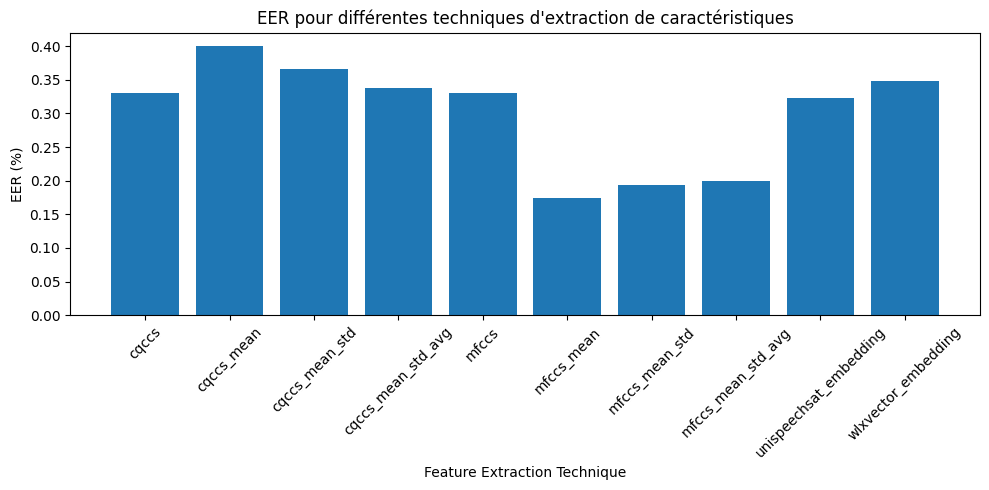

In [13]:
plt.figure(figsize=(10, 5))  
plt.bar(methods_list, eer_list)  
plt.xlabel('Feature Extraction Technique')
plt.ylabel('EER (%)')  
plt.title('EER pour différentes techniques d\'extraction de caractéristiques') 
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  